In [25]:
import pandas as pd
import seaborn as sns
import numpy as np

In [4]:
df = pd.read_csv('2025-VeloCityX-Expanded-Fan-Engagement-Data.csv')

In [5]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   User ID                                  100 non-null    object
 1   Fan Challenges Completed                 100 non-null    int64 
 2   Predictive Accuracy (%)                  100 non-null    int64 
 3   Virtual Merchandise Purchases            100 non-null    int64 
 4   Sponsorship Interactions (Ad Clicks)     100 non-null    int64 
 5   Time on Live 360 (mins)                  100 non-null    int64 
 6   Real-Time Chat Activity (Messages Sent)  100 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 5.6+ KB


,User ID,Fan Challenges Completed,Predictive Accuracy (%),Virtual Merchandise Purchases,Sponsorship Interactions (Ad Clicks),Time on Live 360 (mins),Real-Time Chat Activity (Messages Sent)
0,U001,5,80,3,10,120,20
1,U002,8,60,1,8,100,35
2,U003,3,90,0,6,90,5
3,U004,7,70,2,15,140,40
4,U005,2,50,5,3,60,8


In [6]:
df.describe()

,Fan Challenges Completed,Predictive Accuracy (%),Virtual Merchandise Purchases,Sponsorship Interactions (Ad Clicks),Time on Live 360 (mins),Real-Time Chat Activity (Messages Sent)
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,5.790000,74.990000,2.670000,8.680000,129.350000,25.050000
std,2.825908,14.033506,2.064882,6.340315,38.634358,14.163101
min,1.000000,50.000000,0.000000,0.000000,60.000000,0.000000
25%,3.000000,62.000000,1.000000,2.000000,98.000000,11.000000
50%,6.000000,77.000000,2.000000,8.000000,124.500000,25.500000
75%,8.000000,86.500000,5.000000,15.000000,160.000000,35.000000
max,10.000000,98.000000,6.000000,19.000000,199.000000,49.000000


In [7]:
df.isnull().sum()

User ID                                    0
Fan Challenges Completed                   0
Predictive Accuracy (%)                    0
Virtual Merchandise Purchases              0
Sponsorship Interactions (Ad Clicks)       0
Time on Live 360 (mins)                    0
Real-Time Chat Activity (Messages Sent)    0
dtype: int64

No null values detected.

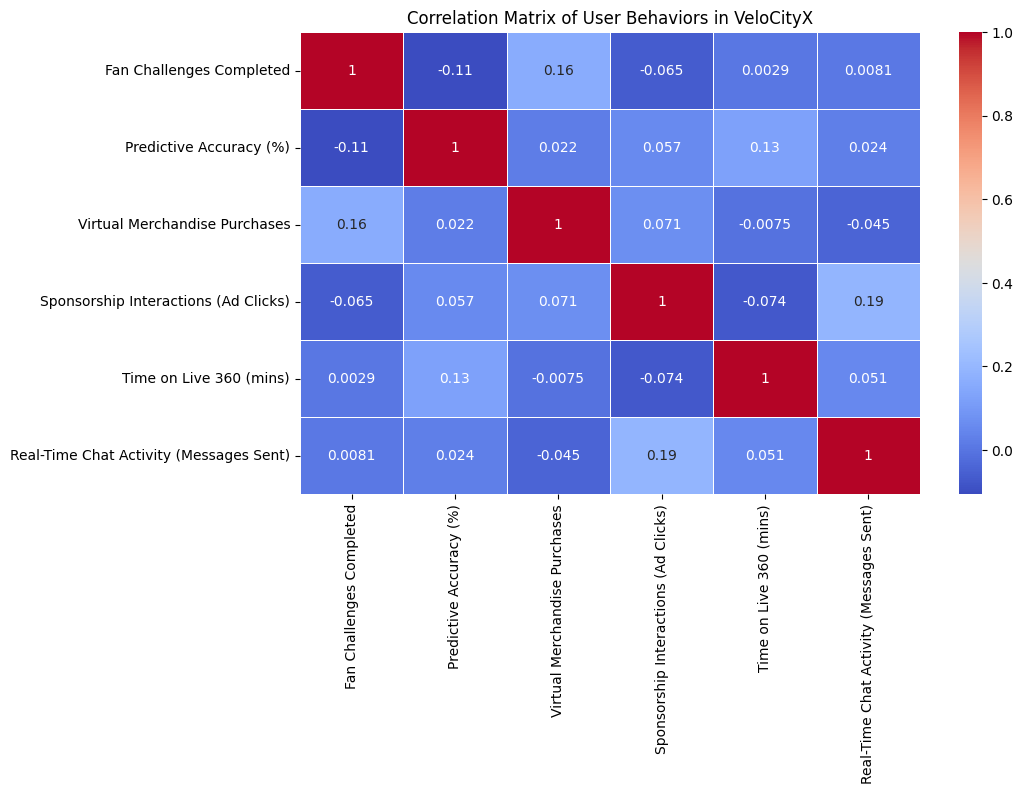

In [13]:
import matplotlib.pyplot as plt
correlation_matrix = df.select_dtypes(include=['number']).corr() #excluding userID
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of User Behaviors in VeloCityX')
plt.show()

There appear to be weak correlations between every variable. Since the correlation coefficients are close to 0, we can assume they have little to no correlation. The other highest correlation here is between Ad Clicks and Time on Live, obviously the longer the individual is on live, the more ads they receive, but it is still irrelevant for our purposes.

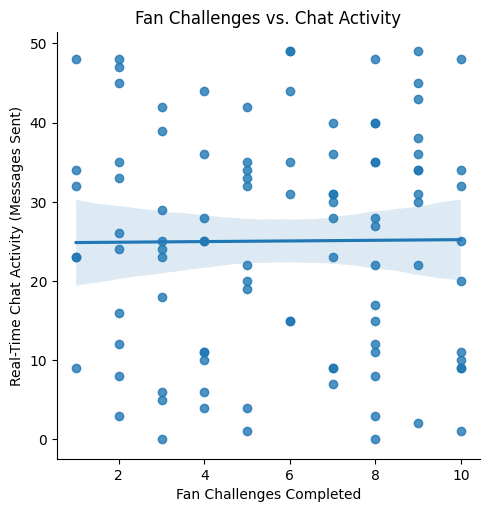

<Figure size 800x600 with 0 Axes>

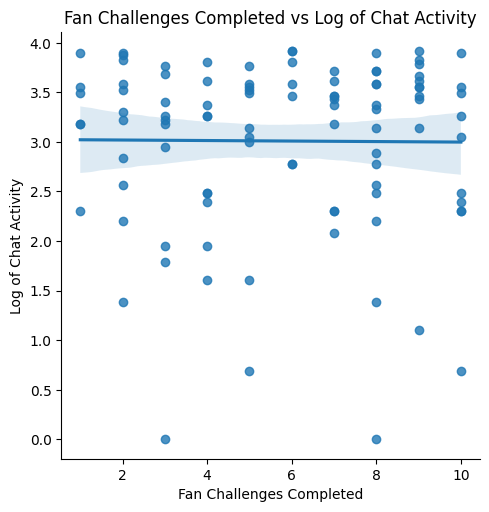

<Figure size 800x600 with 0 Axes>

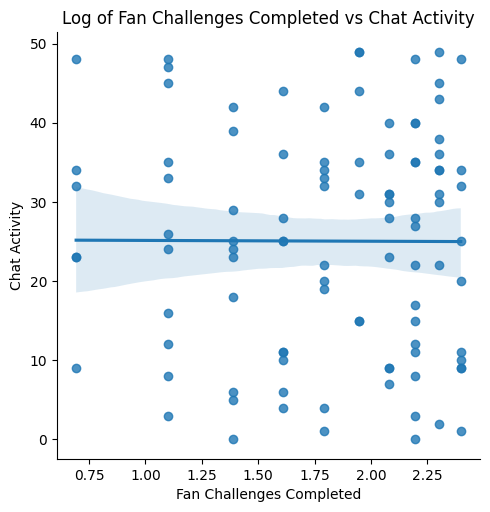

In [40]:
sns.lmplot(x='Fan Challenges Completed', y='Real-Time Chat Activity (Messages Sent)', data=df)
plt.title('Fan Challenges vs. Chat Activity')
plt.show()

df['Log_Chat_Activity'] = np.log1p(df['Real-Time Chat Activity (Messages Sent)']) #log transformation
plt.figure(figsize=(8, 6))
sns.lmplot(x='Fan Challenges Completed', y='Log_Chat_Activity', data=df)
plt.title('Fan Challenges Completed vs Log of Chat Activity')
plt.xlabel('Fan Challenges Completed')
plt.ylabel('Log of Chat Activity')
plt.show()

df['Log_Fan_Challenges'] = np.log1p(df['Fan Challenges Completed']) #log transformation
plt.figure(figsize=(8, 6))
sns.lmplot(x='Log_Fan_Challenges', y='Real-Time Chat Activity (Messages Sent)', data=df)
plt.title('Log of Fan Challenges Completed vs Chat Activity')
plt.xlabel('Fan Challenges Completed')
plt.ylabel('Chat Activity')
plt.show()


A smaller sample size here could possibly be normalizing the trend lines.

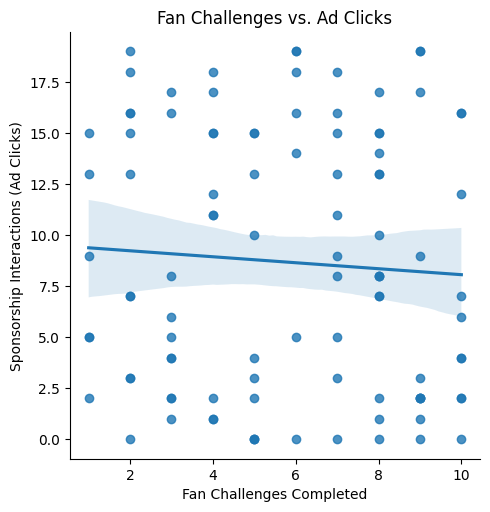

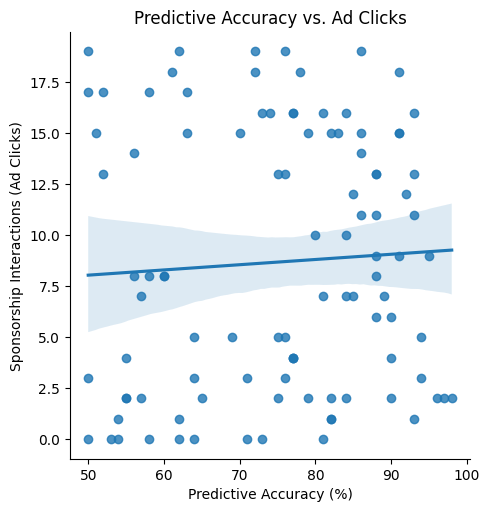

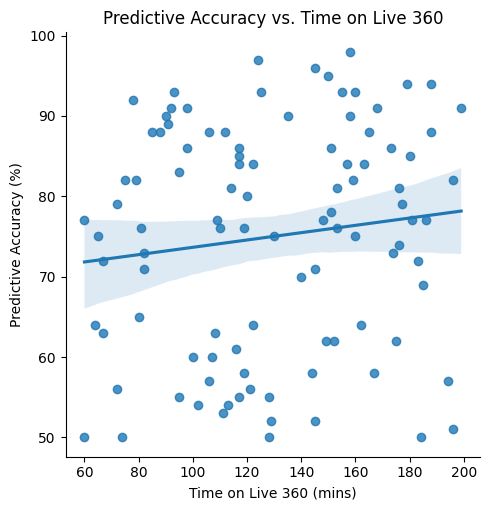

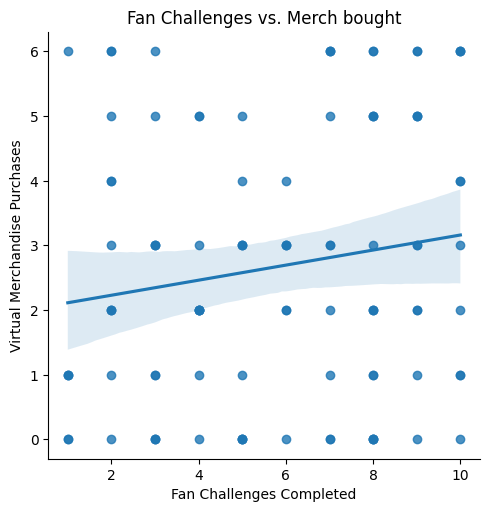

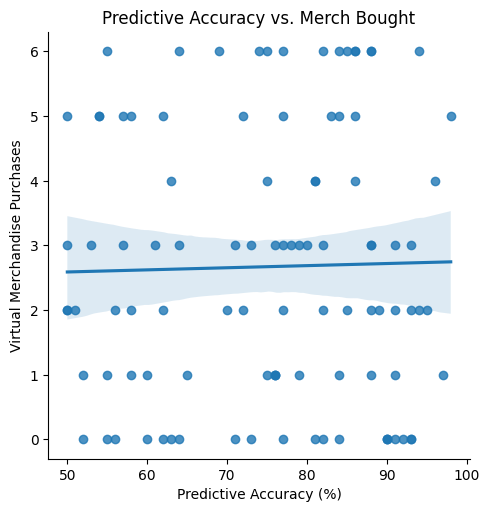

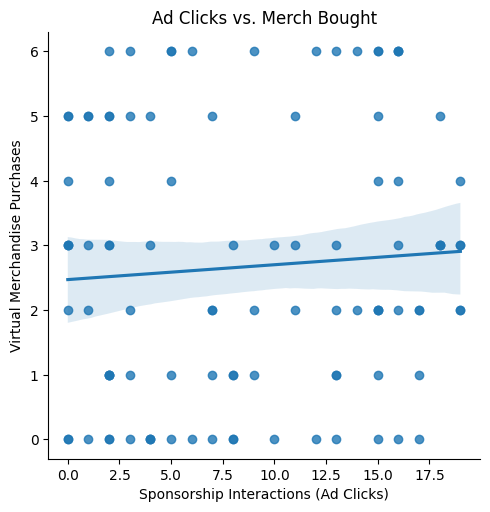

In [45]:
sns.lmplot(x='Fan Challenges Completed', y='Sponsorship Interactions (Ad Clicks)', data=df)
plt.title('Fan Challenges vs. Ad Clicks')
plt.show()

sns.lmplot(x='Predictive Accuracy (%)', y='Sponsorship Interactions (Ad Clicks)', data=df)
plt.title('Predictive Accuracy vs. Ad Clicks')
plt.show()

sns.lmplot(x='Time on Live 360 (mins)', y='Predictive Accuracy (%)', data=df)
plt.title('Predictive Accuracy vs. Time on Live 360')
plt.show()

sns.lmplot(x='Fan Challenges Completed', y='Virtual Merchandise Purchases', data=df)
plt.title('Fan Challenges vs. Merch bought')
plt.show()

sns.lmplot(x='Predictive Accuracy (%)', y='Virtual Merchandise Purchases', data=df)
plt.title('Predictive Accuracy vs. Merch Bought')
plt.show()

sns.lmplot(x='Sponsorship Interactions (Ad Clicks)', y='Virtual Merchandise Purchases', data=df)
plt.title('Ad Clicks vs. Merch Bought')
plt.show()

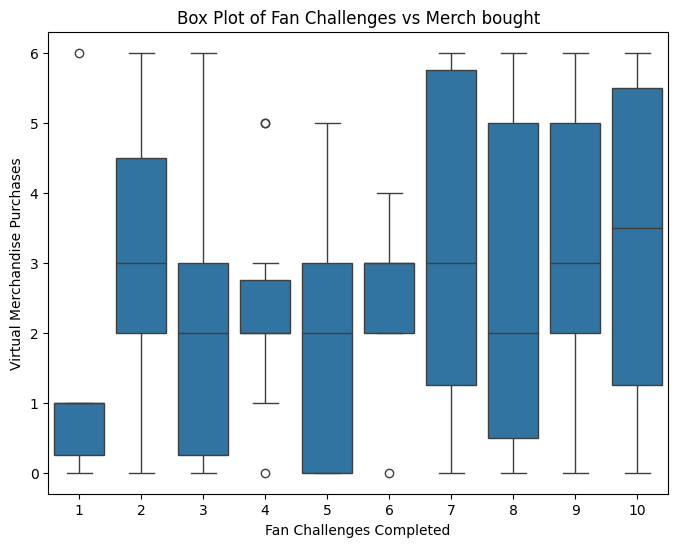

In [34]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Fan Challenges Completed', y='Virtual Merchandise Purchases', data=df)
plt.title('Box Plot of Fan Challenges vs Merch bought')
plt.show()

In [20]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X = df[['Fan Challenges Completed', 'Predictive Accuracy (%)', 'Sponsorship Interactions (Ad Clicks)', 'Time on Live 360 (mins)', 'Real-Time Chat Activity (Messages Sent)']]
y = df['Virtual Merchandise Purchases']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 4.331663610820608
R-squared: -0.03380993098343854


Using linear regression model to predict Virtual Merchandise purchases, we find that the average error between the predicted value and actual value with this model is about 4.3 units, which is a LOT. That, along with our R-squared value being in the negatives, means that either my model just sucks, or there is little to no way of predicting merchandise purchases.

In [38]:
print(df[['Predictive Accuracy (%)', 'Virtual Merchandise Purchases', 'Sponsorship Interactions (Ad Clicks)' ]].corr())


                                      Predictive Accuracy (%)  \
Predictive Accuracy (%)                              1.000000   
Virtual Merchandise Purchases                        0.022194   
Sponsorship Interactions (Ad Clicks)                 0.056612   

                                      Virtual Merchandise Purchases  \
Predictive Accuracy (%)                                    0.022194   
Virtual Merchandise Purchases                              1.000000   
Sponsorship Interactions (Ad Clicks)                       0.070550   

                                      Sponsorship Interactions (Ad Clicks)  
Predictive Accuracy (%)                                           0.056612  
Virtual Merchandise Purchases                                     0.070550  
Sponsorship Interactions (Ad Clicks)                              1.000000  


To conclude, we can say that:
- Fan Challenges Completed: Users have completed between 1 and 10 challenges, with an average of 5.79.
- Predictive Accuracy: Ranges from 50% to 98%, with an average of about 75%.
- Virtual Merchandise Purchases: Users have purchased up to 6 items, averaging 2.67.
- Sponsorship Interactions: Users clicked on ads between 0 and 19 times, averaging 8.68 clicks.
- Time on Live 360: Users spent between 60 and 199 minutes, with an average of 129 minutes.
- Real-Time Chat Activity: The number of messages ranges from 0 to 49, with an average of 25.

- Encouraging users to complete fan challenges can result in more virtual merchandise being bought. The user's predictive accuracy does not matter in this case.
- It appears that fan challenges can possibly distract users from clicking on ads.
- The longer the user is on live, the better their predictive accuracy gets, but their chances for buying merch or clicking on ads slightly decrease.
- A user is slightly more likely to buy merch if they click on more ads.

A sample size of 100 is not sufficient to calculate trends on such an app. This is evident when the linear regression model does not work. There is extremely weak correlation between most variables.